In [1]:
import pandas as pd

# Carica il dataset
df = pd.read_csv('owid-covid-data.csv')

#                                      1. Verifica delle Dimensioni del Dataset e Metadati

# Dimensioni del dataset
num_rows, num_columns = df.shape

# Numero di righe e colonne
print(f"Il numero delle righe è: {num_rows} e il numero delle colonne è: {num_columns}")


Il numero delle righe è: 429435 e il numero delle colonne è: 67


In [2]:
# Visualizzo i metadati
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [3]:
#                                 2. Si chiede di trovare, per ogni continente:
# a. il numero di casi fin dall'inizio della pandemia 
# b. la percentuale rispetto al totale mondiale del numero di casi      

# Filtro i dati rimuovendo le righe con valori nulli nelle colonne 'new_cases' e 'continent'
df_cleaned = df.dropna(subset=['new_cases', 'continent'])

continent_data = df_cleaned.groupby('continent')['new_cases'].sum()
world_total_cases = df_cleaned['new_cases'].sum()
continent_percentage = (continent_data / world_total_cases) * 100
continent_data_millions = continent_data / 1_000_000
for continent in continent_data_millions.index:
    total_cases = round(continent_data_millions[continent], 2)
    percentage = round(continent_percentage[continent], 2)
    
    print(f"Continent: {continent}")
    print(f"  Totale casi (in milioni): {total_cases}")
    print(f"  Percentuale rispetto al totale mondiale: {percentage} %\n")


Continent: Africa
  Totale casi (in milioni): 13.15
  Percentuale rispetto al totale mondiale: 1.69 %

Continent: Asia
  Totale casi (in milioni): 301.56
  Percentuale rispetto al totale mondiale: 38.86 %

Continent: Europe
  Totale casi (in milioni): 252.92
  Percentuale rispetto al totale mondiale: 32.6 %

Continent: North America
  Totale casi (in milioni): 124.49
  Percentuale rispetto al totale mondiale: 16.04 %

Continent: Oceania
  Totale casi (in milioni): 15.0
  Percentuale rispetto al totale mondiale: 1.93 %

Continent: South America
  Totale casi (in milioni): 68.81
  Percentuale rispetto al totale mondiale: 8.87 %



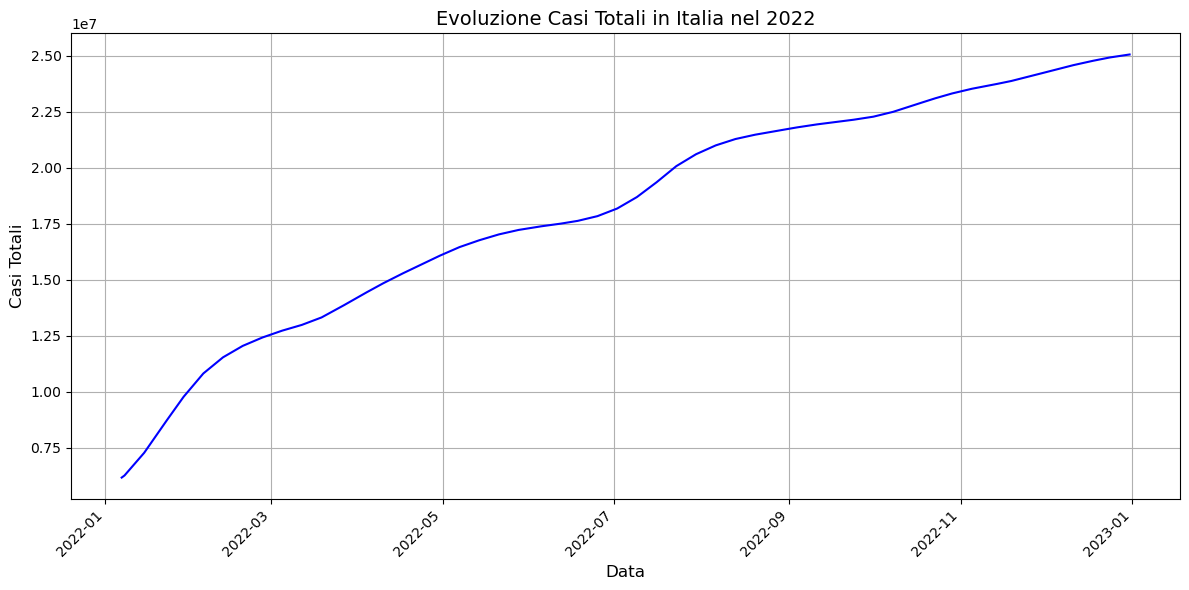

In [4]:
#                              3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
# a. l'evoluzione del casi totali dall'inizio alla fine dell'anno 

import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)].copy()
df_italy_2022['smoothed_cases'] = df_italy_2022['total_cases'].rolling(window=7).mean()

plt.figure(figsize=(12,6))  
plt.plot(df_italy_2022['date'], df_italy_2022['smoothed_cases'], label="Casi Totali (Smussati)", color='b')
plt.title("Evoluzione Casi Totali in Italia nel 2022", fontsize=14)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Casi Totali", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()

# Nota il grafico è stato realizzato con una media mobile a 7 giorni cosi da smussare i picchi altrimenti presenti

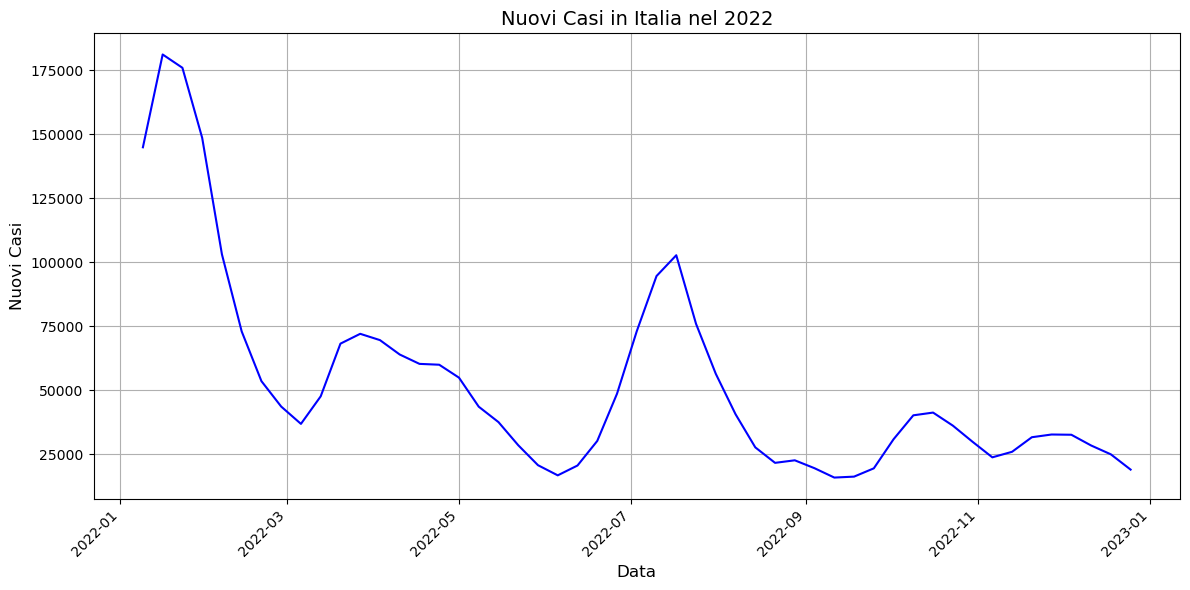

In [5]:
# b. il numero di nuovi casi rispetto alla data k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)].copy()
df_italy_2022['new_cases'] = df_italy_2022['total_cases'].diff().fillna(0)
df_italy_2022['smoothed_new_cases'] = df_italy_2022['new_cases'].rolling(window=7).mean()
df_italy_2022 = df_italy_2022[df_italy_2022['new_cases'] > 0]

plt.figure(figsize=(12,6))
plt.plot(df_italy_2022['date'], df_italy_2022['smoothed_new_cases'], label="Nuovi Casi (Smussati)", color='blue')
plt.title("Nuovi Casi in Italia nel 2022", fontsize=14)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Nuovi Casi", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

# Nota anche questo grafico è stato realizzato con una media mobile a 7 giorni cosi da smussare i picchi altrimenti presenti
# Ho rimosso dalla 'new_cases' tutti i valori minori di 0


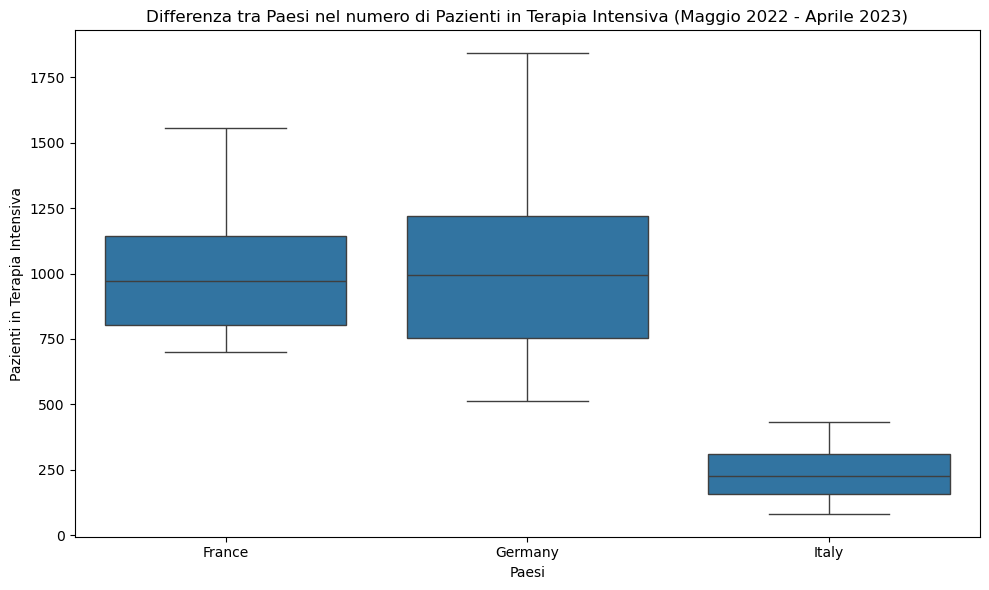

In [6]:
#                                      4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni 
#riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso) 

df_intensivecare = df_cleaned[(df_cleaned['location'].isin(['Italy', 'Germany', 'France'])) & 
            (df_cleaned['date'] >= '2022-05-01') & (df_cleaned['date'] <= '2023-04-30')]

import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='location', y='icu_patients', data=df_intensivecare)
plt.title("Differenza tra Paesi nel numero di Pazienti in Terapia Intensiva (Maggio 2022 - Aprile 2023)")
plt.xlabel("Paesi")
plt.ylabel("Pazienti in Terapia Intensiva")
plt.tight_layout()
plt.show()
#                                          a.Scrivere un breve commento a riguardo
# Commento sui risultati
# Il boxplot mostra la distribuzione del numero di pazienti in terapia intensiva per Italia, Germania e Francia nel periodo compreso 
# tra maggio 2022 e aprile 2023. 
# Dal grafico è possibile osservare:
#1. GERMANIA: La distribuzione dei pazienti ICU in Italia mostra una variabilità considerevole, con alcuni valori estremamente alti.
# Tuttavia, la mediana si trova in una posizione molto ribassata comparabile alla Francia.
#2. ITALIA: L'Italia sembra avere una distribuzione più stretta, con una mediana che è generalmente più bassa rispetto agli altri paesi. 
# Questo potrebbe suggerire un minore numero di pazienti in terapia intensiva durante il periodo analizzato.
#3. FRANCIA: La distribuzione dei pazienti ICU in Francia è anch'essa più ampia rispetto all'Italia, 
#Ma la mediana appare simile a quella dell'Germania, indicando una situazione sanitaria comparabile.




Somma dei pazienti ospitalizzati per paese nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


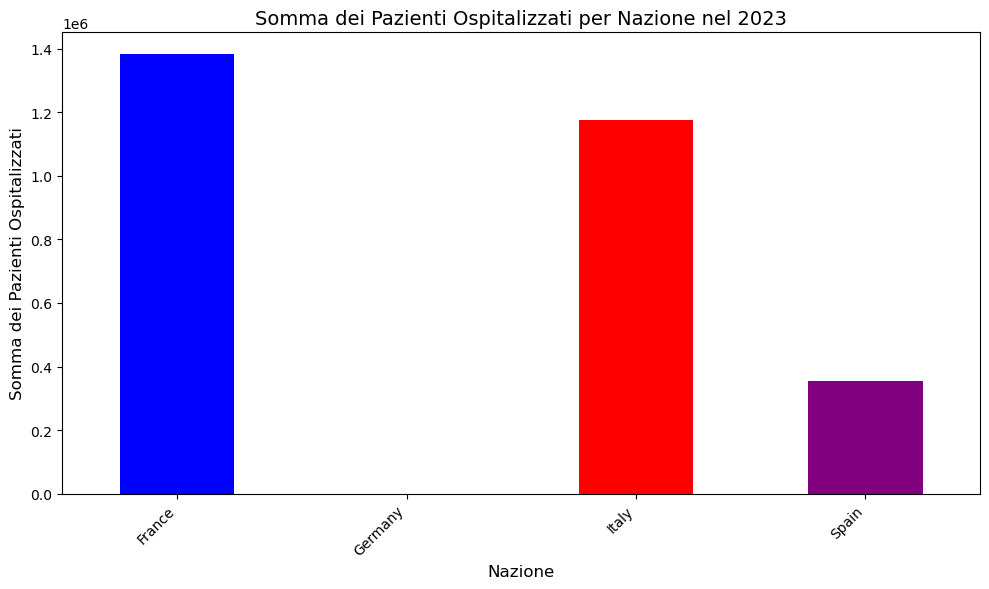


Numero di valori nulli per paese nel 2023:
location
France     275
Germany    365
Spain      203
Name: hosp_patients, dtype: int64

Ci sono dati nulli nella colonna 'hosp_patients' per il 2023.
Per Francia e Spagna potremmo sostituire i valori nulli con la mediana per ogni paese.
Per la Germania potremmo usare la colonna weekly_icu_admissions,visto che la colonna hosp_patients non ha registro di pazienti ospedalizzati .


In [8]:
#                                  5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: 

#                                  a. mostrare la somma dei pazienti ospitalizzati per ognuna
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
countries = ['Italy', 'Germany', 'France', 'Spain']
df_2023 = df[(df['location'].isin(countries)) & (df['date'].dt.year == 2023)].copy()
hospitalized_sum = df_2023.groupby('location')['hosp_patients'].sum()
print("Somma dei pazienti ospitalizzati per paese nel 2023:")
print(hospitalized_sum)

plt.figure(figsize=(10,6))
hospitalized_sum.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title("Somma dei Pazienti Ospitalizzati per Nazione nel 2023", fontsize=14)
plt.xlabel("Nazione", fontsize=12)
plt.ylabel("Somma dei Pazienti Ospitalizzati", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

#                  b.se ci sono dati nulli con un breve commento scrivere se puo essere possibile gestirli tramite sostituzione o meno

null_data = df_2023[df_2023['hosp_patients'].isna()]  # Utilizziamo 'hosp_patients'
print("\nNumero di valori nulli per paese nel 2023:")
null_count = null_data.groupby('location')['hosp_patients'].size()  # Conta il numero di righe con valori nulli
print(null_count)

if null_data.empty:
    print("\nNon ci sono dati nulli nella colonna 'hosp_patients' per il 2023.")
else:
    print("\nCi sono dati nulli nella colonna 'hosp_patients' per il 2023.")
    print("Per Francia e Spagna potremmo sostituire i valori nulli con la mediana per ogni paese.")
    print("Per la Germania potremmo usare la colonna weekly_icu_admissions,visto che la colonna hosp_patients non ha registro di pazienti ospedalizzati .")
